In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from numpy.random import RandomState

In [2]:
#read the data with pandas
dataframe=pd.read_csv("All-baca-7040x73.csv")

In [6]:
#find the number of rows and columns in the dataframe
dataframe
dataframe['LABEL'].value_counts()

2     880
7     880
12    880
17    880
22    880
27    880
32    880
37    880
Name: LABEL, dtype: int64

In [5]:
# list the column names
dataframe.columns

Index(['SUBJEK', 'KATA', 'LABEL', 'AF3_THETA', 'AF3_ALPHA', 'AF3_LOW_BETA',
       'AF3_HIGH_BETA', 'AF3_GAMMA', 'F7_THETA', 'F7_ALPHA', 'F7_LOW_BETA',
       'F7_HIGH_BETA', 'F7_GAMMA', 'F3_THETA', 'F3_ALPHA', 'F3_LOW_BETA',
       'F3_HIGH_BETA', 'F3_GAMMA', 'FC5_THETA', 'FC5_ALPHA', 'FC5_LOW_BETA',
       'FC5_HIGH_BETA', 'FC5_GAMMA', 'T7_THETA', 'T7_ALPHA', 'T7_LOW_BETA',
       'T7_HIGH_BETA', 'T7_GAMMA', 'P7_THETA', 'P7_ALPHA', 'P7_LOW_BETA',
       'P7_HIGH_BETA', 'P7_GAMMA', 'O1_THETA', 'O1_ALPHA', 'O1_LOW_BETA',
       'O1_HIGH_BETA', 'O1_GAMMA', 'O2_THETA', 'O2_ALPHA', 'O2_LOW_BETA',
       'O2_HIGH_BETA', 'O2_GAMMA', 'P8_THETA', 'P8_ALPHA', 'P8_LOW_BETA',
       'P8_HIGH_BETA', 'P8_GAMMA', 'T8_THETA', 'T8_ALPHA', 'T8_LOW_BETA',
       'T8_HIGH_BETA', 'T8_GAMMA', 'FC6_THETA', 'FC6_ALPHA', 'FC6_LOW_BETA',
       'FC6_HIGH_BETA', 'FC6_GAMMA', 'F4_THETA', 'F4_ALPHA', 'F4_LOW_BETA',
       'F4_HIGH_BETA', 'F4_GAMMA', 'F8_THETA', 'F8_ALPHA', 'F8_LOW_BETA',
       'F8_HIGH_BETA', '

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUBJEK         7040 non-null   object 
 1   KATA           7040 non-null   object 
 2   LABEL          7040 non-null   int64  
 3   AF3_THETA      7040 non-null   float64
 4   AF3_ALPHA      7040 non-null   float64
 5   AF3_LOW_BETA   7040 non-null   float64
 6   AF3_HIGH_BETA  7040 non-null   float64
 7   AF3_GAMMA      7040 non-null   float64
 8   F7_THETA       7040 non-null   float64
 9   F7_ALPHA       7040 non-null   float64
 10  F7_LOW_BETA    7040 non-null   float64
 11  F7_HIGH_BETA   7040 non-null   float64
 12  F7_GAMMA       7040 non-null   float64
 13  F3_THETA       7040 non-null   float64
 14  F3_ALPHA       7040 non-null   float64
 15  F3_LOW_BETA    7040 non-null   float64
 16  F3_HIGH_BETA   7040 non-null   float64
 17  F3_GAMMA       7040 non-null   float64
 18  FC5_THET

In [8]:
subset=dataframe.iloc[:,1:]

In [9]:
subset.shape

(7040, 72)

In [10]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KATA           7040 non-null   object 
 1   LABEL          7040 non-null   int64  
 2   AF3_THETA      7040 non-null   float64
 3   AF3_ALPHA      7040 non-null   float64
 4   AF3_LOW_BETA   7040 non-null   float64
 5   AF3_HIGH_BETA  7040 non-null   float64
 6   AF3_GAMMA      7040 non-null   float64
 7   F7_THETA       7040 non-null   float64
 8   F7_ALPHA       7040 non-null   float64
 9   F7_LOW_BETA    7040 non-null   float64
 10  F7_HIGH_BETA   7040 non-null   float64
 11  F7_GAMMA       7040 non-null   float64
 12  F3_THETA       7040 non-null   float64
 13  F3_ALPHA       7040 non-null   float64
 14  F3_LOW_BETA    7040 non-null   float64
 15  F3_HIGH_BETA   7040 non-null   float64
 16  F3_GAMMA       7040 non-null   float64
 17  FC5_THETA      7040 non-null   float64
 18  FC5_ALPH

In [11]:
subset.isnull().sum()

KATA             0
LABEL            0
AF3_THETA        0
AF3_ALPHA        0
AF3_LOW_BETA     0
                ..
AF4_THETA        0
AF4_ALPHA        0
AF4_LOW_BETA     0
AF4_HIGH_BETA    0
AF4_GAMMA        0
Length: 72, dtype: int64

In [6]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=dataframe['KATA'],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
KATA,
HAUS,880
LAPAR,880
MAKAN,880
MINUM,880
SAKIT,880
SEDIH,880
SENANG,880
TOILET,880


In [7]:
rng = RandomState()
df = pd.read_csv("All-baca-7040x73.csv")
train = dataframe.sample(frac=0.7, random_state=rng)
test = dataframe.loc[~dataframe.index.isin(train.index)]

In [8]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['SUBJEK','KATA','LABEL'],axis=1))
Y_train_label = train.LABEL.values.astype(object)

X_test = pd.DataFrame(test.drop(['SUBJEK','KATA','LABEL'],axis=1))
Y_test_label = test.LABEL.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)


Dimension of Train set (4928, 70)
Dimension of Test set (2112, 70) 

Number of numeric features: 70


In [9]:
final_model = SVC(kernel='rbf', gamma=0.001, C=1000)
#final_model = SVC(kernel='poly', gamma=0.001, C=1000)
final_model.fit(X_train, Y_train)

SVC(C=1000, gamma=0.001)

In [10]:
Y_pred = final_model.predict(X_test)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))

Training set score for SVM: 0.963677
Testing  set score for SVM: 0.788826


In [11]:
# Making the Confusion Matrix
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))


[[203   8   3  10   9  16   4   8]
 [ 12 211  16   5   8   6   2   8]
 [ 10  17 200   4   9  15   4   5]
 [  5  11  11 197   3  14   3   2]
 [  8  13   5   9 209  14   8   3]
 [  3  11   8   5   9 207   9   3]
 [ 11  15  10   8   3   8 229   3]
 [  8   4   4  10   4  14   8 210]]


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       261
           1       0.73      0.79      0.76       268
           2       0.78      0.76      0.77       264
           3       0.79      0.80      0.80       246
           4       0.82      0.78      0.80       269
           5       0.70      0.81      0.75       255
           6       0.86      0.80      0.83       287
           7       0.87      0.80      0.83       262

    accuracy                           0.79      2112
   macro avg       0.79      0.79      0.79      2112
weighted avg       0.79      0.79      0.79      2112

Training set score for SVM: 0.963677
Testing  set score for SVM: 0

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

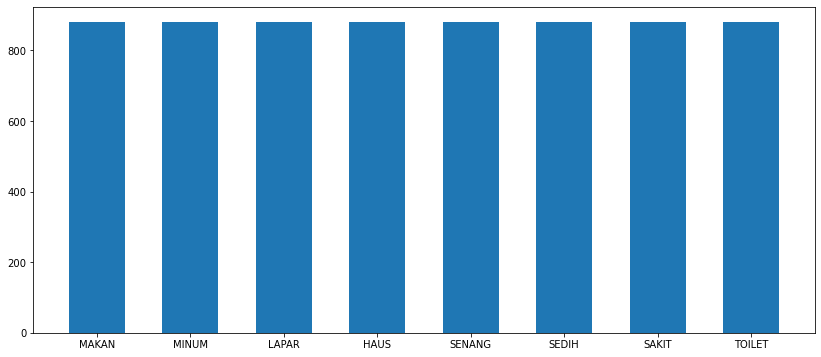

In [14]:
temp = dataframe['KATA'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})


labels = df['labels']
sizes = df['values']

x_pos = [i for i, _ in enumerate(labels)]

plt.figure(1, [14, 6])
plt.bar(x_pos, sizes,width=0.6)
plt.xticks(x_pos, labels)
plt.show()

Confusion matrix, without normalization
[[203   8   3  10   9  16   4   8]
 [ 12 211  16   5   8   6   2   8]
 [ 10  17 200   4   9  15   4   5]
 [  5  11  11 197   3  14   3   2]
 [  8  13   5   9 209  14   8   3]
 [  3  11   8   5   9 207   9   3]
 [ 11  15  10   8   3   8 229   3]
 [  8   4   4  10   4  14   8 210]]
Normalized confusion matrix
[[0.78 0.03 0.01 0.04 0.03 0.06 0.02 0.03]
 [0.04 0.79 0.06 0.02 0.03 0.02 0.01 0.03]
 [0.04 0.06 0.76 0.02 0.03 0.06 0.02 0.02]
 [0.02 0.04 0.04 0.8  0.01 0.06 0.01 0.01]
 [0.03 0.05 0.02 0.03 0.78 0.05 0.03 0.01]
 [0.01 0.04 0.03 0.02 0.04 0.81 0.04 0.01]
 [0.04 0.05 0.03 0.03 0.01 0.03 0.8  0.01]
 [0.03 0.02 0.02 0.04 0.02 0.05 0.03 0.8 ]]


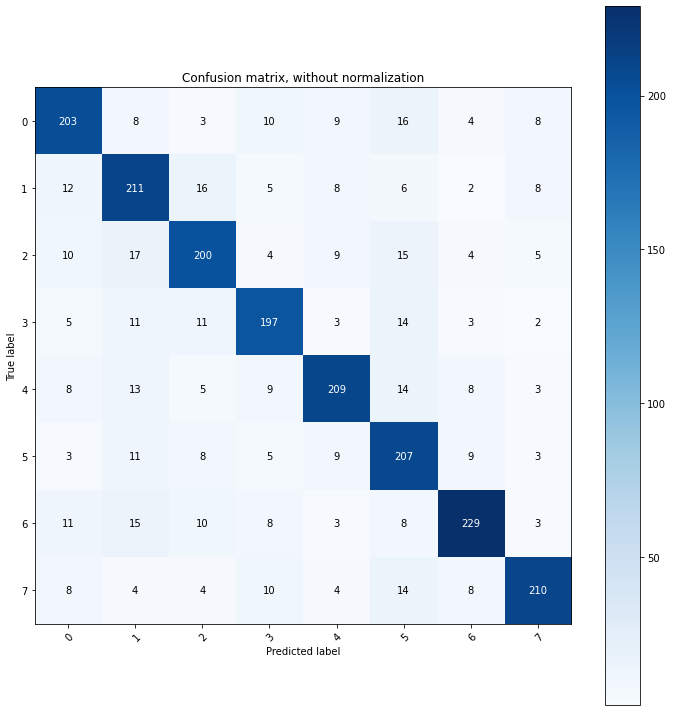

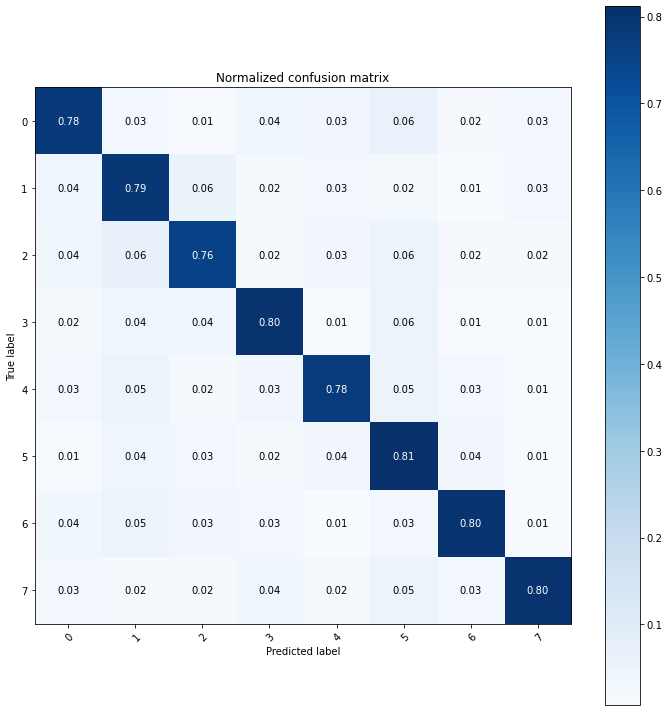

In [15]:
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
y = label_binarize(Y_train, classes=[0,1,2,4,5,6,7])
n_classes = 8

# shuffle and split training and test sets
x_train, x_test, y_train, y_test =\
    train_test_split(X_train, Y_train, test_size=0.33, random_state=0)
# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, Y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\IMBA PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed